<a href="https://colab.research.google.com/github/Atharva573/Predicting-Thermoelectric-Properties-using-Machine-Learning/blob/main/Notebooks/Lattice%20Thermal%20Conductivity%20Model/KNN%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv('seebeck and thermal - targets data - elemental - features.xlsx - Sheet1.csv')
data

,formula,temperature(K),sum_Atomic_Number,sum_Atomic_Weight,sum_Mendeleev_Number,sum_l_quantum_number,sum_Atomic_Radius,sum_Covalent_Radius,sum_Pauling_Electronegativity,sum_number_of_valence_electrons,...,sum_Boiling_Point_(K),sum_Density_(g/mL),sum_specific_heat_(J/g_K)_,sum_heat_of_fusion_(kJ/mol)_,sum_heat_of_vaporization_(kJ/mol)_,sum_thermal_conductivity_(W/(m_K))_,sum_SpaceGroupNumber,seebeck_coefficient,Thermal_conductivity,electrical_conductivity(S/m)
0,BiSb(Se0.92Br0.08)3,300,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-110.0,0.63,27766.0
1,BiSb(Se0.92Br0.08)3,400,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-138.0,0.57,23883.0
2,BiSb(Se0.92Br0.08)3,500,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-163.0,0.53,20850.0
3,BiSb(Se0.92Br0.08)3,600,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-181.0,0.51,19000.0
4,BiSb(Se0.92Br0.08)3,700,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,...,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0,-193.0,0.50,17925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,Ge9Sb2Te12,423,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,77.0,2.86,173636.0
5201,Ge9Sb2Te12,525,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,98.0,2.76,136364.0
5202,Ge9Sb2Te12,625,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,113.0,2.82,120000.0
5203,Ge9Sb2Te12,725,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,...,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0,135.0,2.54,108182.0


In [ ]:
columns_to_exclude = ['formula','seebeck_coefficient' ,'Thermal_conductivity','electrical_conductivity(S/m)']
X = data.drop(columns=columns_to_exclude)
X

,temperature(K),sum_Atomic_Number,sum_Atomic_Weight,sum_Mendeleev_Number,sum_l_quantum_number,sum_Atomic_Radius,sum_Covalent_Radius,sum_Pauling_Electronegativity,sum_number_of_valence_electrons,sum_1st_ionization_potential_(kJ/mol),sum_Melting_point_(K),sum_Boiling_Point_(K),sum_Density_(g/mL),sum_specific_heat_(J/g_K)_,sum_heat_of_fusion_(kJ/mol)_,sum_heat_of_vaporization_(kJ/mol)_,sum_thermal_conductivity_(W/(m_K))_,sum_SpaceGroupNumber
0,300,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
1,400,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
2,500,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
3,600,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
4,700,236.24,567.84693,439.44,5.0,5.8284,6.3152,11.8184,28.24,4407.76,2864.942,6780.462,30.4092,1.32672,50.91408,289.69712,33.63448,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,423,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0
5201,525,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0
5202,625,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0
5203,725,1014.00,2428.21000,1961.00,23.0,28.6700,29.9400,47.3900,118.00,18954.00,21465.050,47530.050,136.1400,5.70000,582.08000,3762.98000,615.90000,4181.0


In [ ]:
y = data['Thermal_conductivity']
y

0       0.63
1       0.57
2       0.53
3       0.51
4       0.50
        ... 
5200    2.86
5201    2.76
5202    2.82
5203    2.54
5204    1.69
Name: Thermal_conductivity, Length: 5205, dtype: float64

In [ ]:
X, y = shuffle(X, y, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

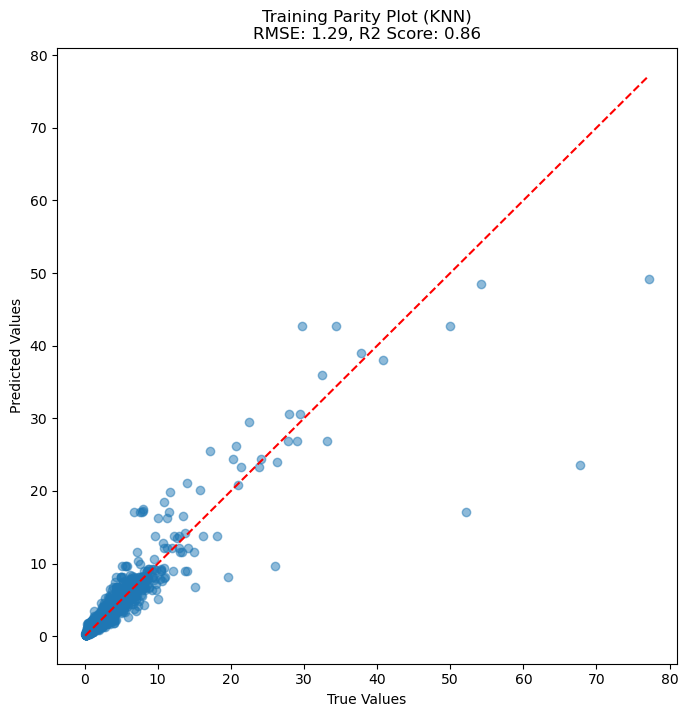

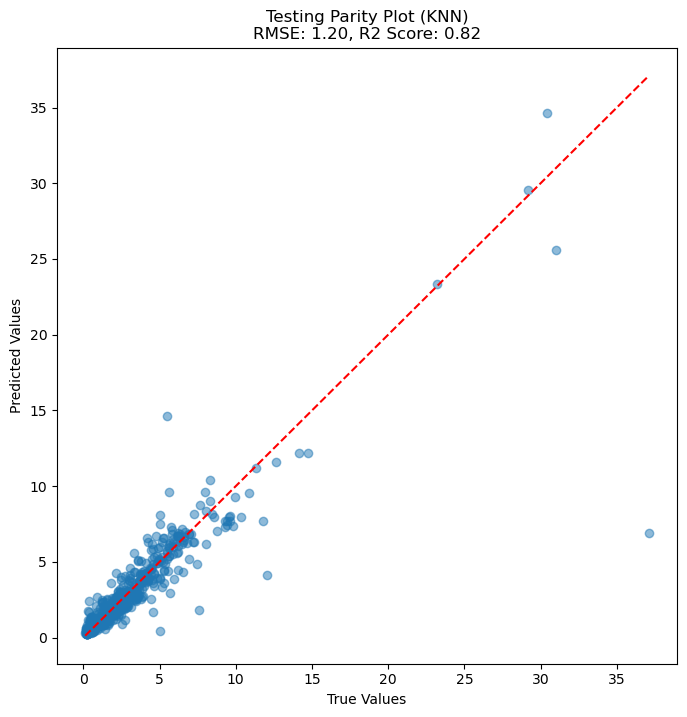

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K) as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate evaluation metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5  # Calculate RMSE from MSE
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5  # Calculate RMSE from MSE
test_r2 = r2_score(y_test, y_test_pred)

# Create parity plot for training data
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Parity Plot (KNN)\nRMSE: {:.2f}, R2 Score: {:.2f}'.format(train_rmse, train_r2))
plt.show()

# Create parity plot for testing data
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing Parity Plot (KNN)\nRMSE: {:.2f}, R2 Score: {:.2f}'.format(test_rmse, test_r2))
plt.show()
